In [1]:
from astropy.table import Table,QTable

import numpy as np

import matplotlib.pyplot as plt
%matplotlib notebook

# Data

In [3]:
data_directory = '/Users/kellydouglass/Documents/Research/data/'

# SGA
SGA_filename = data_directory + 'SGA/LSLGA-ellipse-v3.0.fits'

# MaNGA
MaNGA_filename = data_directory + 'SDSS/dr16/manga/spectro/redux/v2_4_3/drpall-v2_4_3.fits'

In [4]:
SGA = QTable.read(SGA_filename, format='fits')
MaNGA = Table.read(MaNGA_filename, format='fits')

In [7]:
SGA.colnames

['ID',
 'GALAXY',
 'PGC',
 'LSLGA_RA',
 'LSLGA_DEC',
 'MORPHTYPE',
 'PA_LEDA',
 'D25_LEDA',
 'BA_LEDA',
 'Z_LEDA',
 'SB_D25_LEDA',
 'MAG_LEDA',
 'BYHAND',
 'REF',
 'IN_DESI',
 'IN_DESI_GRZ',
 'GROUP_ID',
 'GROUP_NAME',
 'GROUP_MULT',
 'GROUP_PRIMARY',
 'GROUP_RA',
 'GROUP_DEC',
 'GROUP_DIAMETER',
 'DIAM',
 'DIAM_REF',
 'PA',
 'BA',
 'ELLIPSEBIT',
 'RELEASE',
 'BRICKID',
 'BRICKNAME',
 'OBJID',
 'BRICK_PRIMARY',
 'MASKBITS',
 'ITERATIVE',
 'TYPE',
 'RA',
 'DEC',
 'RA_IVAR',
 'DEC_IVAR',
 'BX',
 'BY',
 'DCHISQ',
 'EBV',
 'MJD_MIN',
 'MJD_MAX',
 'REF_CAT',
 'REF_ID',
 'PMRA',
 'PMDEC',
 'PARALLAX',
 'PMRA_IVAR',
 'PMDEC_IVAR',
 'PARALLAX_IVAR',
 'REF_EPOCH',
 'GAIA_POINTSOURCE',
 'GAIA_PHOT_G_MEAN_MAG',
 'GAIA_PHOT_G_MEAN_FLUX_OVER_ERROR',
 'GAIA_PHOT_G_N_OBS',
 'GAIA_PHOT_BP_MEAN_MAG',
 'GAIA_PHOT_BP_MEAN_FLUX_OVER_ERROR',
 'GAIA_PHOT_BP_N_OBS',
 'GAIA_PHOT_RP_MEAN_MAG',
 'GAIA_PHOT_RP_MEAN_FLUX_OVER_ERROR',
 'GAIA_PHOT_RP_N_OBS',
 'GAIA_PHOT_VARIABLE_FLAG',
 'GAIA_ASTROMETRIC_EXCESS_NOI

# Color cuts

Apply the complement color cuts as what is used to select the ellipticals to the sample.  (Essentially, remove those galaxies which are classified as ellipticals.)

Disk galaxies are those with
- (g - r) < 0.68 (GV & BC)
- (g - r) < 2(r - z) - 0.2 (dusty edge-on spirals)

In [17]:
SGA['g_r'] = -2.5*np.log10(SGA['FLUX_G']/SGA['FLUX_R'])
SGA['r_z'] = -2.5*np.log10(SGA['FLUX_R']/SGA['FLUX_Z'])

/Users/kellydouglass/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/Users/kellydouglass/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
/Users/kellydouglass/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.
/Users/kellydouglass/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.
/Users/kellydouglass/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/kellydouglass/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher

In [20]:
spirals_boolean = np.logical_or(SGA['g_r'] < 0.68, 
                                 SGA['g_r'] < 2*SGA['r_z'] - 0.2)

SGA_spirals = SGA[spirals_boolean]

# Redshift distribution

In [15]:
z_bins = np.linspace(0,0.2,100)

<IPython.core.display.Javascript object>


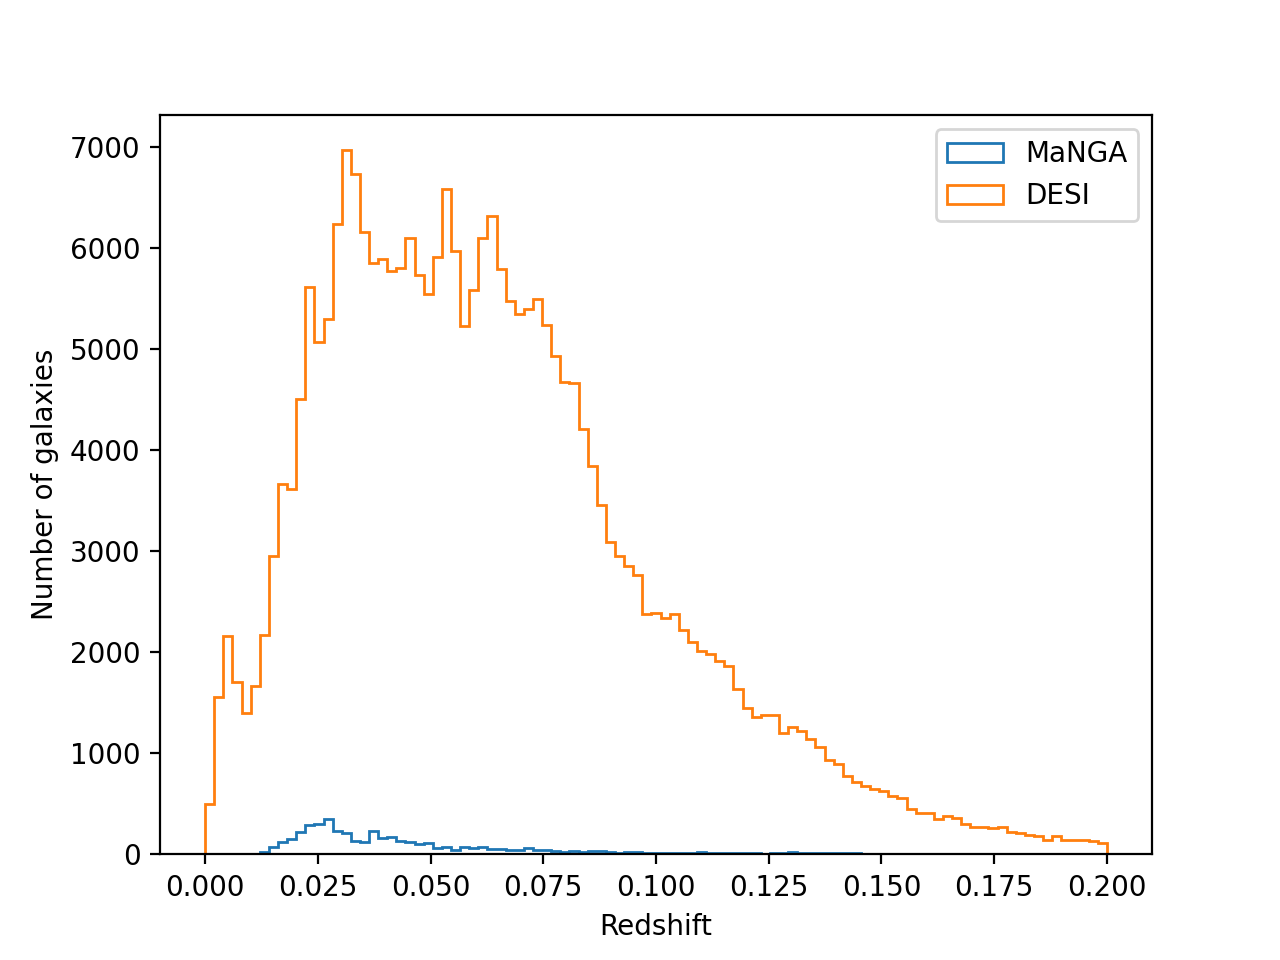

In [21]:
plt.figure()

plt.hist(MaNGA['nsa_z'], bins=z_bins, histtype='step', label='MaNGA')
plt.hist(SGA_spirals['Z_LEDA'][SGA_spirals['IN_DESI']], 
         bins=z_bins, histtype='step', label='DESI')

plt.xlabel('Redshift')
plt.ylabel('Number of galaxies')

plt.legend();